

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>In this section of the report, I'll provide a brief introduction to the dataset I've selected for analysis which is *tmdb-movies* which includes some usefull information like the revenue & budget and the year of release also the genres which desribes the difference in categories of movies and how it affect the audience score


### Question(s) for Analysis
>there will be 2 reasearch questions i will be diving through in this analysis 1st one includes "What generation of movies was believed to be better by the audience and based on the ratings & number of sccuedded movies and the average profits of movies , the 2nd one is what are the best categories of mvoies and most popular ones.




In [21]:
#imported dictionaries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

>  
1) Checking for duplicates 
2) Checking for missing data  
3) Identifying unusefull columns 
4) checking for data types 


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [22]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')



Lets see an overview of the data and see what cleaning processes does it requires


In [23]:
#A brief view to data set columns names
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [24]:
#determine how many rows and columns the data contains
df.shape

(10866, 21)

In [25]:
#identyping the number of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [26]:
#see if there are any duplicates 
df.duplicated().sum()

1

In [27]:
#checking the variety of data contetn
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [28]:
#identyping the type of each data columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [29]:
#A quick view for the Statistics of numerical values in the dataset 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
it requires removing some columns , deleting duplicates, transfering 0 budget & revenue values to Nan to drop it , convert "realease_date" column into datetype
 

1) Removing unwanted columns 

In [30]:
#1 removing unnecessary columns
unwanted_col = ["homepage","production_companies","imdb_id","director","overview","production_companies"]
df.drop(unwanted_col, axis=1 , inplace=True)

In [31]:
#removing the rows of  large missing datas
missing_data= ["tagline","keywords"]
df.drop(missing_data, axis=1, inplace=True)


In [32]:
#check for removing columns
df.head(1)

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


2) Deleting duplicate values

In [33]:
#step 2 deleteing duplicates
df.drop_duplicates(inplace=True)

3) Identifing and transforming 0 budget ,Revenue  rows to Nan values to drop it

In [34]:
#step 3 identifing and removing unusefull rows 
#from df.describe it shows there is 0 values in Revenues, budget and runtime
df.query("budget == 0").count()

id                5696
popularity        5696
budget            5696
revenue           5696
original_title    5696
cast              5631
runtime           5696
genres            5674
release_date      5696
vote_count        5696
vote_average      5696
release_year      5696
budget_adj        5696
revenue_adj       5696
dtype: int64

In [35]:
#checking for the revenue column with missing information
df.query("revenue == 0").count()

id                6016
popularity        6016
budget            6016
revenue           6016
original_title    6016
cast              5945
runtime           6016
genres            5993
release_date      6016
vote_count        6016
vote_average      6016
release_year      6016
budget_adj        6016
revenue_adj       6016
dtype: int64

In [36]:
#checking for the runtime column with missing information
df.query("runtime == 0").count()

id                31
popularity        31
budget            31
revenue           31
original_title    31
cast              31
runtime           31
genres            30
release_date      31
vote_count        31
vote_average      31
release_year      31
budget_adj        31
revenue_adj       31
dtype: int64

0 bugdget & revenues means unusefull raws to analysis
replacing 0 with NaN values to drop rows

In [37]:
#replacing the 0 values in budget columns with NaN values to drop it 
df.budget.replace(0, np.nan ,inplace=True)

In [38]:
#replacing the 0 values in revenue columns with NaN values to drop it 
df.revenue.replace(0 , np.NaN , inplace= True)

In [39]:
#dropping the NaN values
columns= ["revenue","budget"]
df.dropna(subset=columns , inplace = True)

In [40]:
#check the new rows
df.shape

(3854, 14)

4) Transforming "realease date" column to datatype

In [41]:
#4 change release_date column to date type
df["release_date"]= pd.to_datetime(df["release_date"])

In [42]:
#checking for data with 0 values in runtime column
df.query("runtime == 0")

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [43]:
df.describe()
#no More 0 values in the dataframe (min != 0 )

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [44]:
#checing for any more missing values
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              4
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [45]:
#locating the missing rows
df[df.isnull().any(axis=1)]

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4127,21925,0.193929,3000000.0,13308.0,Naqoyqatsi,NaN,89,Documentary|Drama|Music|Thriller,2002-09-02,20,6.0,2002,3.636784e+06,1.613277e+04
4889,126509,0.075043,2500000.0,33400000.0,2016: Obama's America,NaN,87,Documentary,2012-07-13,11,4.7,2012,2.374361e+06,3.172146e+07
7813,22887,0.065543,6000.0,6000.0,Loose Change: Final Cut,NaN,129,Documentary,2007-11-11,12,5.1,2007,6.310011e+03,6.310011e+03
9564,24348,0.168545,2500000.0,589244.0,Powaqqatsi,NaN,99,Documentary|Drama|Music,1988-04-29,18,7.2,1988,4.609728e+06,1.086502e+06


In [46]:
#handling missing values
df.cast.fillna("Random",inplace =True)

In [47]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis



### QUESTION 1 (which generation of movies was considrered the best)


In [48]:
#we create a new profit column to identify which era had the best characteristices
df["profit"] = df["revenue"]- df["budget"]

In [49]:
df.sample(1)

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
8866,17711,0.104908,76000000.0,35134820.0,The Adventures of Rocky & Bullwinkle,Rene Russo|Jason Alexander|Piper Perabo|Randy ...,88,Adventure|Animation|Action|Comedy|Family,2000-06-30,35,4.0,2000,9.623820e+07,4.449095e+07,-40865180.0


In [50]:
#we will divide the movies into 2 dataframes one before 2004 and one before 2004 to apply the anlaysis
df_1 = df.query('release_year < 2004')
df_2 = df.query('release_year > 2004')

In [77]:
#getting the mean of profits amd average vote made in the 2 divided datasets
#using function to avoid reptitive code
profit_1=  df_1.profit.mean()
profit_2 =  df_2.profit.mean()
vote_1= df_1.vote_average.mean()
vote_2 =df_2.vote_average.mean()
def bar_chart(x,y):
    if x == profit_1 and y == profit_2:
        plt.xlabel("Years",fontsize = 12 )
        plt.ylabel("average profit for movies (*10^^8)" , fontsize = 12)
        plt.title("Profit")
        labels = ["years < 2004" , "years > 2004"]
        plt.bar([1,2], [sum_1, sum_2] ,tick_label=labels)
    elif x==vote_1 and y==vote_2:
        plt.title("vote_average")
        plt.xlabel("Years",fontsize = 12 )
        plt.ylabel("average votes for movies" , fontsize = 12)
        labels = ["years < 2004" , "years > 2004"]
        plt.bar([1,2], [vote_1, vote_2] ,tick_label=labels)
   
        
    

Question 1.1 whcih era had the higher average profit of movies

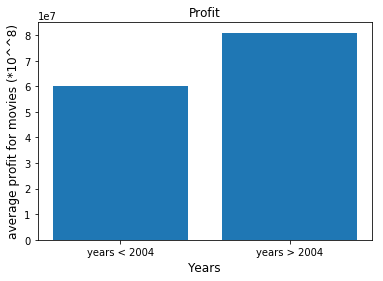

In [92]:
#plotting the years with average profit
bar_chart(profit_1,profit_2)

### Which movies generation had the higher average profit ?
Answer: movies > 2004

Question 1.2 which era had the hightest average vote mean

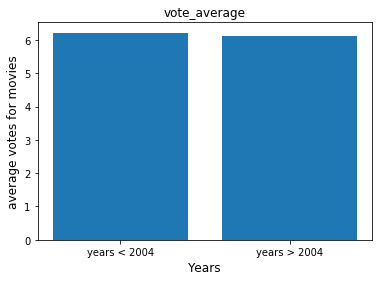

In [79]:
#plotting the years with average vote counts 
bar_chart(vote_1,vote_2)

### Whcih generation had the higher average vote?
Answer: They are both close in score

Question 1.3 How is the average vote related to the mvoies's profit?

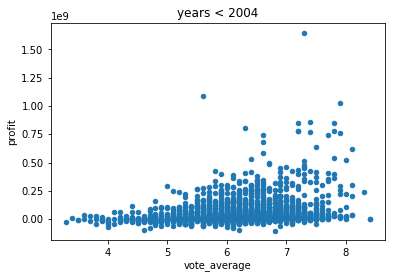

In [95]:
#plotting average vote score with profit for 1st dataframe
df_1.plot(x = "vote_average" , y = "profit",kind = "scatter", title = "years < 2004")

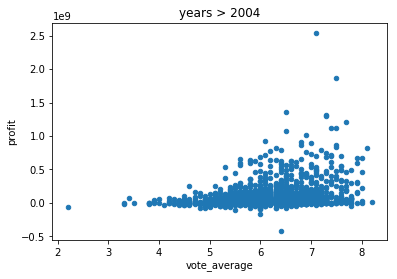

In [80]:
#plotting second dataframe
df_2.plot(x = "vote_average" , y = "profit",kind = "scatter" ,title = "years > 2004")

### What is the relation between the vote_average score and movies profit
Answer: they are postively collerated, the better the score movie has the better he made a profit

Question 1.4 which era had the most failure movies

In [81]:
#counting the number of profitable and non-proftiable movies

i= df_1.query("profit < 0")["profit"].count()
l= df_2.query("profit < 0 ")["profit"].count()

In [82]:
#Creating a ratio for number of succeded and non-succeded movies for both dataframes
s=  df_1.count()["profit"]
h = df_2.count()["profit"]
ratio1= i/s
ratio2 = l/h

<Container object of 2 artists>

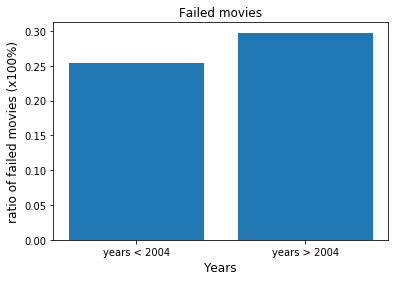

In [83]:
plt.title("Failed movies")
plt.xlabel("Years",fontsize = 12 )
plt.ylabel("ratio of failed movies (x100%)" , fontsize = 12)
labels = ["years < 2004" , "years > 2004"]

plt.bar([1,2], [ratio1, ratio2] ,tick_label=labels)
#conclusion:
#it seems the generation of movies after the year 2004 had much success than before 2004 although it has higher faluire movies ratio but, in general the average profit and average count is higher in movies > 2004


### Which generation had the higher failed movies ratio?
Answer: Movies after 2004 failed more than before 2004

## Research Question 2: ( Which generes are most popular to audience?)


question 1 what movies had the greatest and least revenue of all time


In [84]:
df.loc[df.revenue.idxmax()]

id                                                            19995
popularity                                                  9.43277
budget                                                     2.37e+08
revenue                                                 2.78151e+09
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
vote_count                                                     8458
vote_average                                                    7.1
release_year                                                   2009
budget_adj                                              2.40887e+08
revenue_adj                                             2.82712e+09
profit                                          

In [85]:
df.loc[df.revenue.idxmin()]

id                                                            13537
popularity                                                 0.462609
budget                                                        6e+06
revenue                                                           2
original_title                                      Shattered Glass
cast              Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
runtime                                                          94
genres                                                Drama|History
release_date                                    2003-11-14 00:00:00
vote_count                                                       46
vote_average                                                    6.4
release_year                                                   2003
budget_adj                                              7.11212e+06
revenue_adj                                                 2.37071
profit                                          

### Which movie had the highest and lowest revenue?
Answer: highest movie's revenue - AVatar
lowest movie's revenue - Shattered Glass

Question 2 Which genres are most popular from year to year?

In [86]:
df.genres.str.contains("|").value_counts()

True    3854
Name: genres, dtype: int64

In [87]:
genres_count = pd.Series(df['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count


Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

Text(0,0.5,'Number of movies')

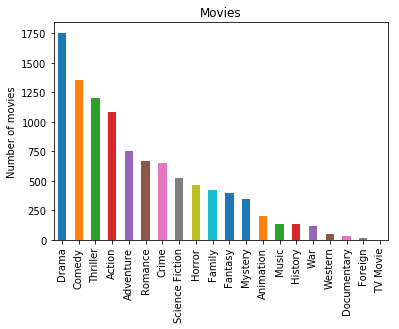

In [88]:
genres_count.plot(kind = "bar" ,title = "Movies").set_ylabel("Number of movies")


# What genres were most popular in making movies
Answer: Drama followed by comedy


Question 3 who are the Top cast of all movies

In [89]:
cast = pd.Series(df['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
C= cast.head(15)
C

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Sylvester Stallone    34
Morgan Freeman        34
Harrison Ford         34
Tom Hanks             34
Brad Pitt             34
Tom Cruise            33
Denzel Washington     32
Eddie Murphy          32
Liam Neeson           31
dtype: int64

Text(0,0.5,'Number of Movies')

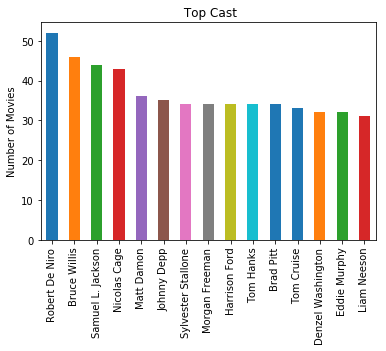

In [90]:
C.plot(kind = "bar" , title = " Top Cast" ).set_ylabel("Number of Movies")

We can clearly see in the visualization that most movies have Robert de Niro as a cast followed by Bruce Wills

# Conclusion

>For our analysis we concluded two things:
The first thing is that the new generation of movies (movies > 2004) despite having  higher average profit but the ratio of un-succeeded movies were slightly higher although they have nearly the same average_vote rate by the audience,, on the other hand we found that the movies with higher average vote come with higher net profit,
Secondly "Action" movies are the most genres filmed movies made in the film making but it doesnt mean it is the most succeedded category of movies becouse avatar which is a "Drama" Category earned the highest revenue so as its from the highest popularity ones

# The limitations associated with the conclusions are:

>1)Every movie had multiple genres 

>2)lack of revenue data for some movies which made them excluded out of the analysis

In [91]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0